<a href="https://colab.research.google.com/github/coddingyun/pytorch/blob/main/Bookstudy_ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 로지스틱 회귀(Logistic Regression)

-이진 분류 (Binary Classification)을 풀기 위한 대표적인 알고리즘

###1. 이진 분류

- S자 형태의 그래프 -> 시그모이드 함수
- H(x) = f(Wx+b)

###2. 시그모이드 함수 (Sigmoid function)

In [ ]:
%matplotlib inline # Cell Magic
# Shift + Enter를 치지 않고 Run 버튼을 눌러 실행하여 그래프를 얻을 수 있다.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x): #시그모이드 함수 정의
  return 1/(1+np.exp(-x))

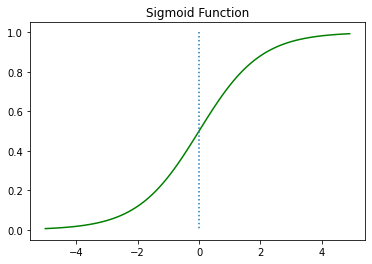

In [ ]:
# W가 1이고 b가 0인 그래프
x = np.arange(-5.0, 5.0, 0.1) #-5부터 5까지 2의 간격으로 반환
y = sigmoid(x)

plt.plot(x,y,'g') #green
plt.plot([0,0],[1.0,0.0],':') #(0,1),(1,1)
plt.title('Sigmoid Function')
plt.show()

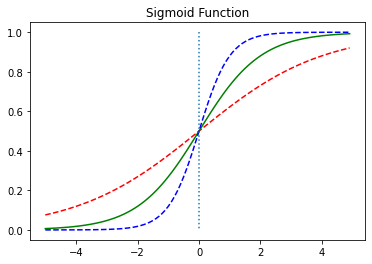

In [ ]:
# W값의 변화에 따른 경사도의 변화
x=np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5*x) # W=0.5
y2 = sigmoid(x) #W=1
y3 = sigmoid(2*x) #W=2

plt.plot(x, y1, 'r', linestyle='--')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'b', linestyle='--')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

- W는 그래프의 경사도를 결정
- W의 값이 커지면 경사가 커지고, W의 값이 작아지면 경사가 작아진다.

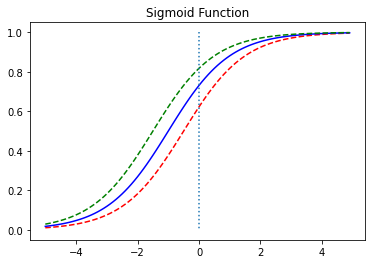

In [ ]:
# b값의 변화에 따른 좌, 우 이동
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(x+0.5) # b=0.5
y2 = sigmoid(x+1) # b=1
y3 = sigmoid(x+1.5) #b=1.5

plt.plot(x,y1,'r',linestyle='--')
plt.plot(x,y2,'b')
plt.plot(x,y3,'g',linestyle='--')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

- 시그모이드 함수의 출력값은 0과 1사이의 값을 가짐

- 0.5 이상이면 1(True), 0.5이하이면 0(False)

###3. 비용 함수 (Cost function)
- 평균 제곱 오차를 사용하면 심한 비볼록(non-convex) 형태의 그래프가 나옴
- 경사 하강법이 오차가 최소값이 되는 구간에 도착했다고 판단한 그 구간이 실제 오차가 완전히 최소값이 되는 구간이 아닐 수 있다는 문제점이 있음
(Global Minimum이 아닌 Local Minimum에 도달)


- if y=1, cost(H(x),y) = -log(H(x)) /
if y=0, cost(H(x),y) = -log(1-H(x))
- cost(H(x),y)=-[ylogH(x)+(1-y)log(1-H(x))]

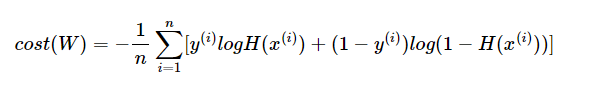

###4. 파이토치로 로지스틱 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [ ]:
W=torch.zeros((2,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b],lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  hypothesis = torch.sigmoid(x_train.matmul(W)+b)
  cost = -(y_train*torch.log(hypothesis)+(1-y_train)*torch.log(1-hypothesis)).mean()
  #또는 F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [ ]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [ ]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


#2. nn.Module로 구현하는 로지스틱 회귀

###1. 파이토치의 nn.Linear와 nn.Sigmoid로 로지스틱 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
model = nn.Sequential( # 여러 함수들을 연결해주는 역할
    nn.Linear(2,1), # input dim=2, output dim=1
    nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
) # W와 b는 랜덤 초기화가 된 상태

In [ ]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward>)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 ==0:
    prediction = hypothesis >= torch.FloatTensor([0.5]) # 0.5 이상 True
    correct_prediction = prediction.float() == y_train # 실제 값과 일치 True
    accuracy = correct_prediction.sum().item()/len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.527002 Accuracy 83.33%
Epoch   10/1000 Cost: 0.994596 Accuracy 66.67%
Epoch   20/1000 Cost: 0.570399 Accuracy 83.33%
Epoch   30/1000 Cost: 0.473909 Accuracy 83.33%
Epoch   40/1000 Cost: 0.388606 Accuracy 83.33%
Epoch   50/1000 Cost: 0.307901 Accuracy 83.33%
Epoch   60/1000 Cost: 0.235923 Accuracy 83.33%
Epoch   70/1000 Cost: 0.182916 Accuracy 100.00%
Epoch   80/1000 Cost: 0.155795 Accuracy 100.00%
Epoch   90/1000 Cost: 0.143031 Accuracy 100.00%
Epoch  100/1000 Cost: 0.133369 Accuracy 100.00%
Epoch  110/1000 Cost: 0.124978 Accuracy 100.00%
Epoch  120/1000 Cost: 0.117600 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111060 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105223 Accuracy 100.00%
Epoch  150/1000 Cost: 0.099983 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095251 Accuracy 100.00%
Epoch  170/1000 Cost: 0.090958 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087044 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083461 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080169 Accuracy 100.00%

In [ ]:
model(x_train)

tensor([[2.7553e-04],
        [3.1567e-02],
        [3.8923e-02],
        [9.5627e-01],
        [9.9824e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2543, 1.5186]], requires_grad=True), Parameter containing:
tensor([-14.4881], requires_grad=True)]


###2. 인공 신경망으로 표현되는 로지스틱 회귀

- 로지스틱 회귀는 인공 신경망으로 간주할 수 있다.

#3. 클래스로 파이토치 모델 구현하기

###1. 모델을 클래스로 구현하기

In [ ]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self): # 객체가 갖는 속성 초기화, 객체 생성 시 자동 호출
    super().__init__() # nn.Module 클래스의 속성들을 가지고 초기화
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x): # model(입력데이터) forward 연산 수행
    return self.sigmoid(self.linear(x))

###2. 로지스틱 회귀 클래스로 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()
  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [ ]:
model = BinaryClassifier()

In [ ]:
optimizer = optim.SGD(model.parameters(),lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  hypothesis = model(x_train)
  cost = F.binary_cross_entropy(hypothesis, y_train)
  
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 10 == 0:
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction == y_train
    accuracy = correct_prediction.sum().item()/len(correct_prediction)
    print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00

In [ ]:
model(x_train)

tensor([[2.7616e-04],
        [3.1595e-02],
        [3.8959e-02],
        [9.5624e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[3.2534, 1.5181]], requires_grad=True), Parameter containing:
tensor([-14.4839], requires_grad=True)]
